In [34]:
import codecs
import re
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import sklearn.feature_extraction.text as txt
from nltk.corpus import stopwords
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model as lin
from sklearn.model_selection import cross_val_score
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import copy 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import gensim
import nltk
from sklearn.model_selection import GridSearchCV


In [2]:
languages = ['french','english']
stop_words = []
for l in languages:
    for w in stopwords.words(l):
        stop_words.append(w)
# Prend une phrase en français et rend la stemmatisation de la phrase
def convertF(words) :
    stemmer = FrenchStemmer()
    current_words = list()
    for i in words.split() :
        updated_word = stemmer.stem(i)
        current_words.append(updated_word)
    return " ".join(current_words)

# Prend une phrase en français et rend la phrase sans les stops words
def deleteStopWords(words):
    current_words = list()
    for i in words.split() :
        if i in stop_words:
            continue
        current_words.append(i)
    return " ".join(current_words)
# Prend une phrase en anglais et rend la stemmatisation de la phrase
def convertE(words) :
    stemmer = SnowballStemmer("english")
    current_words = list()
    for i in words.split() :
        updated_word = stemmer.stem(i)
        current_words.append(updated_word)
    return " ".join(current_words)

In [3]:
path = "data/movies1000/pos/"
# va contenir les données de movies sans la stemmatisation
alltxtsMovies = [] # init vide
# va contenir les données de movies avec la stemmatisation
alltxtsMoviesStem = []
# va contenir les données de movies sans la stemmatisation sans stop words
alltxtsMoviesStop = [] # init vide
# va contenir les données de movies avec la stemmatisation sans stop words
alltxtsMoviesStemStop = []
labsMovies = []
for cl in os.listdir(path): # parcours des fichiers d'un répertoire
    alltxtsMovies.append(open(path+cl, "r").read())
    alltxtsMoviesStem.append(convertE(open(path+cl, "r").read()))
    alltxtsMoviesStop.append(deleteStopWords(open(path+cl, "r").read()))
    alltxtsMoviesStemStop.append(convertE(deleteStopWords(open(path+cl, "r").read())))
    labsMovies.append(1)
path = "data/movies1000/neg/"
for cl in os.listdir(path): # parcours des fichiers d'un répertoire
    alltxtsMovies.append(open(path+cl, "r").read())
    alltxtsMoviesStem.append(convertE(open(path+cl, "r").read()))
    alltxtsMoviesStop.append(deleteStopWords(open(path+cl, "r").read()))
    alltxtsMoviesStemStop.append(convertE(deleteStopWords(open(path+cl, "r").read())))
    labsMovies.append(-1)

In [4]:
alltxtsMovies=pd.DataFrame(alltxtsMovies)
alltxtsMoviesStem=pd.DataFrame(alltxtsMoviesStem)
alltxtsMoviesStop=pd.DataFrame(alltxtsMoviesStop)
alltxtsMoviesStemStop=pd.DataFrame(alltxtsMoviesStemStop)

In [5]:
url ="embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
embeddings = gensim.models.KeyedVectors.load_word2vec_format(url, binary=True)

In [6]:
alltxtsMovies.rename(columns={0:'Reviews'}, inplace=True)
alltxtsMoviesStem.rename(columns={0:'Reviews'}, inplace=True)
alltxtsMoviesStop.rename(columns={0:'Reviews'}, inplace=True)
alltxtsMoviesStemStop.rename(columns={0:'Reviews'}, inplace=True)

In [7]:
docs_vectors = pd.DataFrame() # creating empty final dataframe
for doc in alltxtsMovies['Reviews'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True) # append each document value to the final dataframe


In [8]:
docs_vectorsStem = pd.DataFrame() # creating empty final dataframe
for doc in alltxtsMoviesStem['Reviews'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectorsStem = docs_vectorsStem.append(doc_vector, ignore_index = True) # append each document value to the final dataframe


In [9]:
docs_vectorsStop = pd.DataFrame() # creating empty final dataframe
for doc in alltxtsMoviesStop['Reviews'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectorsStop = docs_vectorsStop.append(doc_vector, ignore_index = True) # append each document value to the final dataframe


In [10]:
docs_vectorsStemStop = pd.DataFrame() # creating empty final dataframe
for doc in alltxtsMoviesStemStop['Reviews'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectorsStemStop = docs_vectorsStemStop.append(doc_vector, ignore_index = True) # append each document value to the final dataframe


In [30]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectors, labsMovies, test_size=0.2)
model =  svm.LinearSVC(max_iter=150000)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8125

In [31]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectorsStop, labsMovies, test_size=0.2)
model =  svm.LinearSVC(max_iter=10000,class_weight="balanced")
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.855

In [14]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectorsStem, labsMovies, test_size=0.4, random_state=1)

model =  svm.LinearSVC(max_iter=150000)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.76

In [16]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectorsStemStop, labsMovies, test_size=0.4, random_state=1)
model =  svm.LinearSVC(max_iter=150000)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.7825

In [32]:
pipeline = Pipeline([
    ('classifier',  svm.LinearSVC())
])
pipeline.get_params()

{'memory': None,
 'steps': [('classifier',
   LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
             verbose=0))],
 'verbose': False,
 'classifier': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 'classifier__C': 1.0,
 'classifier__class_weight': None,
 'classifier__dual': True,
 'classifier__fit_intercept': True,
 'classifier__intercept_scaling': 1,
 'classifier__loss': 'squared_hinge',
 'classifier__max_iter': 1000,
 'classifier__multi_class': 'ovr',
 'classifier__penalty': 'l2',
 'classifier__random_state': None,
 'classifier__tol': 0.0001,
 'classifier__verbose': 0}

In [35]:
grid = {
'classifier__C': [1.0,0.8, 0.7],
 'classifier__class_weight': [None, 'balanced'],
 'classifier__dual': [False],
 'classifier__max_iter': [2000,1000,6000,9000],
 'classifier__penalty': ['l2','l1']
    
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=1, cv=5)
grid_search.fit(X=docs_vectorsStop, y=labsMovies)

/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the num

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))],
                                verbose=False),
             iid='deprecated', n_jobs=1,
             param_grid={'classifier__C': [1.0, 0.8, 0.7],
                         'classifier__class_weight': [None, 'balanced'],
 

In [36]:
print("-----------")
print(grid_search.best_score_)
print(grid_search.best_params_)

-----------
0.8435
{'classifier__C': 1.0, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__max_iter': 2000, 'classifier__penalty': 'l2'}


In [75]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectorsStop, labsMovies, test_size=0.2)
model =  svm.LinearSVC(max_iter=20000,class_weight="balanced",penalty= 'l2',dual= False)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8575

In [73]:
alltxtsMoviesTest = []
fname_test="data/testSentiment.txt"
s=codecs.open(fname_test, 'r','utf-8') # pour régler le codage
#generation du bow du fichier test
file =open(fname_test, "r").read()
alltxtsMoviesTest =file.split("\n")
print(len(alltxtsMoviesTest))

25001


In [58]:
alltxtsMoviesTestStop =[]
for i in alltxtsMoviesTest:
    alltxtsMoviesTestStop.append(deleteStopWords(i))

In [61]:
print(len(alltxtsMoviesTestStop))
alltxtsMoviesTestStop=pd.DataFrame(alltxtsMoviesTestStop)

alltxtsMoviesTestStop.rename(columns={0:'Reviews'}, inplace=True)

25001


In [62]:
docs_vectorsTestStop = pd.DataFrame() # creating empty final dataframe
for doc in alltxtsMoviesTestStop['Reviews'].str.lower().str.replace('[^a-z ]', ''): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        try:
            word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
            temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
        except:
            pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    docs_vectorsTestStop = docs_vectorsTestStop.append(doc_vector, ignore_index = True) # append each document value to the final dataframe


In [66]:
docs_vectorsTestStop= docs_vectorsTestStop.fillna(method='ffill')


In [67]:
model =  svm.LinearSVC(max_iter=20000,class_weight="balanced",penalty= 'l2',dual= False)
model.fit(docs_vectorsStop, labsMovies)
resultMovies = model.predict(docs_vectorsTestStop)


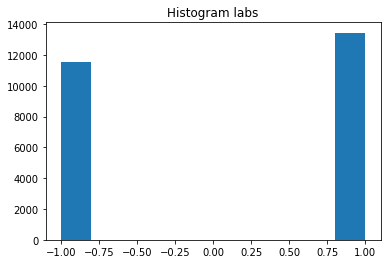

In [68]:
plt.hist(resultMovies)
plt.title("Histogram labs")
plt.show()

In [69]:

fichier = open("predictionMovies.txt", "a")
for i in range(len(resultMovies)):
    fichier.write(str(resultMovies[i])+"\n")

In [71]:
len(resultMovies)

25001

In [78]:
X_train, X_test, y_train, y_test = train_test_split(docs_vectorsStop, labsMovies, test_size=0.2)
model =  GaussianNB()
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.7225